In [13]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("ehababoelnaga/multiple-disease-prediction")
print("Path to dataset files:", path)

Path to dataset files: /Users/thatikondakinshuk/.cache/kagglehub/datasets/ehababoelnaga/multiple-disease-prediction/versions/1


In [15]:
import os
# List downloaded files
print(os.listdir(path))

['Blood_samples_dataset_balanced_2(f).csv', 'blood_samples_dataset_test.csv']


In [16]:
# Load the dataset
df = pd.read_csv("blood_samples_dataset_test.csv")

# Preview the first 5 rows
print(df.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

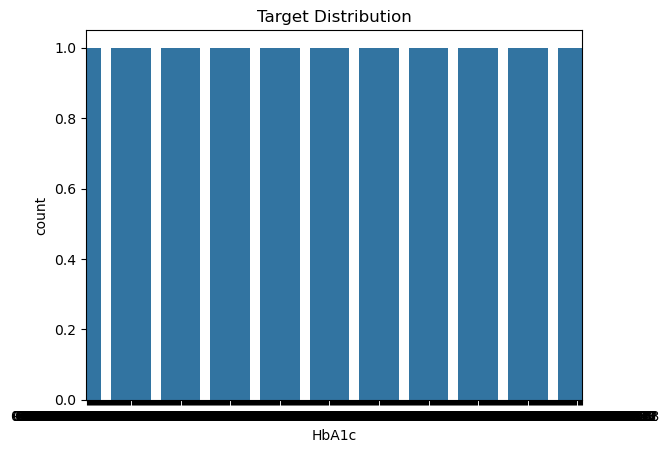

In [17]:
# Basic dataset info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize target distribution (assuming the target column is named 'disease')
sns.countplot(x='HbA1c', data=df)
plt.title('Target Distribution')
plt.show()


In [18]:
import pandas as pd

# Example dataframe
df = pd.read_csv('blood_samples_dataset_test.csv')

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the median for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing values for categorical columns using mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify the result
print(df.head())



    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184

In [19]:
# Define features (X) and target (y)
X = df.drop('HbA1c', axis=1)
y = df['HbA1c']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'df' is your dataset
X = df.drop('HbA1c', axis=1)  # Features
y = df['HbA1c']  # Target variable (e.g., HbA1c levels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
numeric_features = X.select_dtypes(include=['number']).columns  # Numeric columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),  # Handle missing values in numeric columns
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical columns
        ]), categorical_features)
    ])

# Combine preprocessing and the regression model into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor for continuous target variable
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Output predictions
print(y_pred)


[0.50276501 0.42505587 0.5261672  0.47675831 0.46077341 0.46442704
 0.49787664 0.35893937 0.49867239 0.53002561 0.52664893 0.50436275
 0.48416448 0.46585806 0.41687369 0.53334946 0.37573353 0.47799815
 0.54220704 0.42383442 0.47668483 0.5445997  0.50574009 0.52174905
 0.48583617 0.51563368 0.45358018 0.45707524 0.47864608 0.58874222
 0.52517316 0.47667365 0.46984532 0.46170394 0.51718901 0.47496207
 0.54522285 0.55141568 0.45178654 0.42797622 0.46490879 0.47416956
 0.4747162  0.54476233 0.59028067 0.53008789 0.59921149 0.40264083
 0.42182967 0.50018136 0.53907694 0.42675123 0.47356959 0.46835421
 0.49015659 0.56884633 0.590326   0.57961768 0.50965653 0.48098593
 0.47185049 0.52129537 0.60195933 0.42991583 0.5053887  0.55758681
 0.35897871 0.55155279 0.58555452 0.52605743 0.52562791 0.61015604
 0.48672698 0.49824092 0.54315323 0.50366798 0.4599526  0.57718327
 0.54893185 0.54236291 0.60658748 0.49114445 0.43531077 0.6021627
 0.45930899 0.50947173 0.51114025 0.45323765 0.51601995 0.60075

Mean Absolute Error (MAE): 0.25927508411086353
Mean Squared Error (MSE): 0.08962040939278115
R-squared: -0.0875204655201749


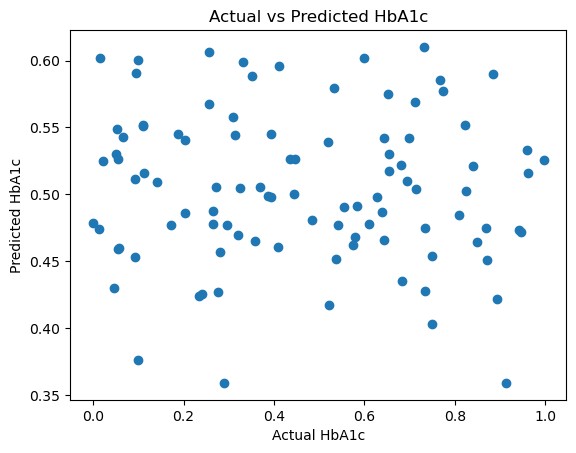

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = pipeline.predict(X_test)

# Print regression metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Optional: Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual HbA1c")
plt.ylabel("Predicted HbA1c")
plt.title("Actual vs Predicted HbA1c")
plt.show()


In [4]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Path to the CSV file
CSV_FILE = 'patient_details.csv'

# Define feature columns
X = pd.DataFrame(columns=[
    'Glucose', 
    'Cholesterol', 
    'Hemoglobin', 
    'Hematocrit', 
    'Red Blood Cells', 
    'Platelets', 
    'White Blood Cells', 
    'Red Blood Cell Count', 
    'HbA1c'
])

# Define and train the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Example training data (replace with actual data)
X_train = np.array([
    [120, 180, 15, 45, 5, 200, 7000, 4.5, 6.2],
    [85, 160, 13, 42, 4.8, 180, 7200, 4.6, 5.8]
])
y_train = ['Diabetes', 'Normal']

pipeline.fit(X_train, y_train)

# Function to create sample data for Diabetic and Normal patient
def create_sample_data():
    # Diabetic patient data
    diabetic_patient = {
        'Name': 'John Doe',
        'Phone Number': '1234567890',
        'Age': 45,
        'Glucose': 180,
        'Cholesterol': 240,
        'Hemoglobin': 14,
        'Hematocrit': 45,
        'Red Blood Cells': 5.5,
        'Platelets': 200,
        'White Blood Cells': 7000,
        'Red Blood Cell Count': 4.8,
        'HbA1c': 7.5
    }
    
    # Normal patient data
    normal_patient = {
        'Name': 'Jane Smith',
        'Phone Number': '0987654321',
        'Age': 30,
        'Glucose': 85,
        'Cholesterol': 160,
        'Hemoglobin': 13,
        'Hematocrit': 42,
        'Red Blood Cells': 4.6,
        'Platelets': 180,
        'White Blood Cells': 7200,
        'Red Blood Cell Count': 4.7,
        'HbA1c': 5.5
    }
    
    return diabetic_patient, normal_patient

def predict_and_save_sample_data():
    """Function to predict diseases and save sample data."""
    diabetic_patient, normal_patient = create_sample_data()
    
    # Prediction for Diabetic Patient
    diabetic_medical_data = {key: diabetic_patient[key] for key in X.columns}
    prediction = pipeline.predict([list(diabetic_medical_data.values())])[0]
    diabetic_patient['Predicted Disease'] = prediction
    diabetic_patient['Timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Prediction for Normal Patient
    normal_medical_data = {key: normal_patient[key] for key in X.columns}
    prediction = pipeline.predict([list(normal_medical_data.values())])[0]
    normal_patient['Predicted Disease'] = prediction
    normal_patient['Timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Save to CSV
    save_to_csv(diabetic_patient, CSV_FILE)
    save_to_csv(normal_patient, CSV_FILE)

    return diabetic_patient, normal_patient

def save_to_csv(data, file_path):
    """Save patient details to a CSV file."""
    file_exists = os.path.isfile(file_path)
    df = pd.DataFrame([data])
    df.to_csv(file_path, mode='a', header=not file_exists, index=False)
    print(f"\n✅ Patient details saved to '{file_path}'.")

def display_patient_data():
    """Display patient data in tabular form."""
    # Load data from CSV to show as table
    df = pd.read_csv(CSV_FILE)
    print("\nPatient Data:")
    print(df)

    # Plotting the data (optional visualization)
    plt.figure(figsize=(10, 6))
    df[['Age', 'Glucose', 'Cholesterol', 'HbA1c']].plot(kind='bar', x='Age', stacked=False, color=['red', 'blue', 'green', 'orange'])
    plt.title('Patient Data Overview')
    plt.ylabel('Values')
    plt.show()

# Call the function to predict and save sample data
diabetic_patient, normal_patient = predict_and_save_sample_data()

# Display the saved patient data and visualize
display_patient_data()



✨ **Patient Disease Prediction** ✨
----------------------------------------

Please enter the following medical details:


🔍 **Predicted Disease or Condition:** Normal

✅ Patient details saved to 'patient_details.csv'.
